In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression # import the class
from sklearn.model_selection import train_test_split ##for spliting data
#from sklearn import datasets, linear_model, metrics ##for linear regression model
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
import statsmodels.api as sm ##for ols
df = pd.read_csv(r'C:\Users\Admin\OneDrive - National University of Sciences & Technology\Desktop\Breast Cancer\BreastTissue.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)
df['Class'] = np.where(df['Class'] == "car", 1, 0)##Recoding variable and converting to dummy 
df.head()
features = ['DA', 'Area']
X = df.loc[:, features] ### Sub-data consisting all X variables
X = sm.add_constant(X)
y = df.loc[:, ['Class']]##Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
random_state=0, train_size = .75)##Spliting data into training and testing

     Case  Class           I0     PA500       HFS           DA           Area  \
0        1   car   524.794072  0.187448  0.032114   228.800228    6843.598481   
1        2   car   330.000000  0.226893  0.265290   121.154201    3163.239472   
2        3   car   551.879287  0.232478  0.063530   264.804935   11888.391830   
3        4   car   380.000000  0.240855  0.286234   137.640111    5402.171180   
4        5   car   362.831266  0.200713  0.244346   124.912559    3290.462446   
..     ...   ...          ...       ...       ...          ...            ...   
101    102   adi  2000.000000  0.106989  0.105418   520.222649   40087.920980   
102    103   adi  2600.000000  0.200538  0.208043  1063.441427  174480.476200   
103    104   adi  1600.000000  0.071908 -0.066323   436.943603   12655.342130   
104    105   adi  2300.000000  0.045029  0.136834   185.446044    5086.292497   
105    106   adi  2600.000000  0.069988  0.048869   745.474369   39845.773700   

           A/DA      Max IP

In [48]:

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model with data
logreg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [49]:
y_pred = logreg.predict(X_test)## Prediction for test set

In [50]:
y_pred #predicted values
from sklearn import metrics   # import the metrics class

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20,  0],
       [ 7,  0]], dtype=int64)

Text(0.5, 257.44, 'Predicted Class')

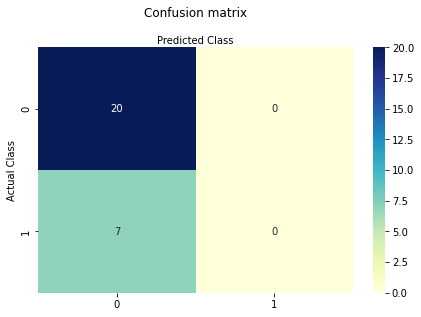

In [51]:

#Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') ##map color Yellow-Green-Blue 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

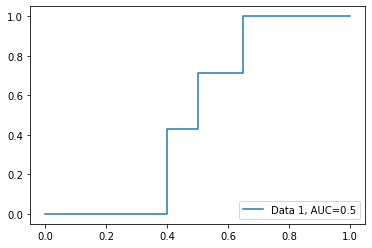

In [52]:
##RoC Curve Receiver Operating Characteristic(ROC) curve is a plot of the
#true positive rate against the false positive rate. 
#It shows the tradeoff between sensitivity and specificity.
y_pred_proba = logreg.predict_proba(X_test)[::,1] ##predicted probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)##Metric roc_curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)##AUC score for the case is 0.88. 
##AUC score 1 represents a perfect classifier, 
##AUC 0.5 represents a worthless classifier.
plt.plot(fpr,tpr,label="Data 1, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [55]:
#model = LogisticRegression(solver='liblinear', random_state=0)
#logreg.fit(X, y)
logreg.classes_

array([0, 1])

In [58]:
logreg.classes_  ##classes
logreg.intercept_ ##Intercept of model
logreg.coef_ ##Coefficiencts
logreg.predict_proba(X_test) ##Predicred Probabilities

array([[0.878223  , 0.121777  ],
       [0.81791447, 0.18208553],
       [0.8021551 , 0.1978449 ],
       [0.81955861, 0.18044139],
       [0.77333815, 0.22666185],
       [0.83998614, 0.16001386],
       [0.90116012, 0.09883988],
       [0.77942234, 0.22057766],
       [0.77624938, 0.22375062],
       [0.8307764 , 0.1692236 ],
       [0.76006427, 0.23993573],
       [0.76239298, 0.23760702],
       [0.76115449, 0.23884551],
       [0.76364777, 0.23635223],
       [0.81253721, 0.18746279],
       [0.79564853, 0.20435147],
       [0.79875098, 0.20124902],
       [0.80897534, 0.19102466],
       [0.84583212, 0.15416788],
       [0.79478295, 0.20521705],
       [0.86395652, 0.13604348],
       [0.80131636, 0.19868364],
       [0.77071557, 0.22928443],
       [0.86681232, 0.13318768],
       [0.77229446, 0.22770554],
       [0.7902805 , 0.2097195 ],
       [0.76006241, 0.23993759]])

In [61]:
logreg.score(X_train, y_train) ##ratio of the number of correct predictions to the number of observations.

0.8227848101265823

In [71]:
###Runing Logistic Regression Using State.Model Package (sm)

m2 = sm.Logit(y, X)
result = m2.fit(method='newton')
m2.params
m2.predict(X)
(result.predict(X) >= 0.5).astype(int)
m2.pred_table()
m2.summary()

Optimization terminated successfully.
         Current function value: 0.495955
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  106
Model:                          Logit   Df Residuals:                      103
Method:                           MLE   Df Model:                            2
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                0.003658
Time:                        22:43:00   Log-Likelihood:                -52.571
converged:                       True   LL-Null:                       -52.764
Covariance Type:            nonrobust   LLR p-value:                    0.8245
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2513      0.362     -3.453      0.001      -1.961      -0.541
DA            -0.0008      0.002     -0.371      0.711      -0.005       0.003
Area        -1.39e-06   2.45e-05     -0.057      0.955   -4.94e-05    4.66e-05
==============================================================================
"""